In [1]:
# importing Libraries

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#Reading DF
df=pd.read_csv('data_file.csv')

In [4]:
# First 5 rows
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
# Last 5 rows
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [6]:
# Size of df
df.size

7754941

In [7]:
# rows*cols in df
df.shape

(209593, 37)

In [8]:
# Base information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [9]:
df[:].isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [10]:
df = df.drop(columns=['Unnamed: 0'])

In [11]:
X = df.drop(columns = ['label'])
y = df['label']

In [12]:
X

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [13]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [14]:
le=LabelEncoder()
for i in X:
    X[i]=le.fit_transform(X[i].astype(str))

In [15]:
# Treating data imbalance
from imblearn.over_sampling import ADASYN
from collections import Counter

In [16]:
counter = Counter(y)
print(counter)
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({1: 183431, 0: 26162})
Counter({0: 183626, 1: 183431})


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[-0.98556026, -0.05469974,  0.08523186, ...,  1.05251095,
         0.        ,  0.77437016],
       [ 0.91844691,  1.15234498, -1.1961911 , ..., -0.71720055,
         0.        ,  1.88284302],
       [-1.10858411,  0.3223903 , -1.00467134, ..., -0.71720055,
         0.        ,  2.35790282],
       ...,
       [ 0.27347148,  1.50090812, -0.58514333, ..., -0.71720055,
         0.        , -0.3341027 ],
       [ 0.29575638,  1.56420219, -0.58794497, ..., -0.71720055,
         0.        , -0.12296501],
       [ 0.24549879,  0.59963617, -0.64745169, ..., -0.14197329,
         0.        ,  0.40487921]])

In [19]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns

In [20]:
vif

,vif,Features
0,1.000318,msisdn
1,1.001654,aon
2,8.981684,daily_decr30
3,8.901230,daily_decr90
4,2.288885,rental30
5,2.278308,rental90
6,1.027469,last_rech_date_ma
7,1.055873,last_rech_date_da
8,2.648203,last_rech_amt_ma
9,2.260631,cnt_ma_rech30


In [21]:
col_drop_list = list(vif['vif']>5)

In [22]:
X_scaled=pd.DataFrame(X_scaled)

In [23]:
for i in X_scaled:
    if col_drop_list[i]==True:
        X_scaled = X_scaled.drop(columns=[i])

In [24]:
X_scaled.shape

(367057, 28)

In [25]:
X_scaled['label'] = y

In [26]:
X_scaled.shape

(367057, 29)

In [27]:
df_n = X_scaled

In [28]:
df_n

,0,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,27,28,32,33,34,label
0,-0.985560,-0.054700,-0.392478,-0.167080,-0.390610,-0.108992,-0.875994,-0.201460,-0.277229,0.356180,-0.746450,1.423599,-0.104329,-0.038166,0.162098,-0.831849,1.365815,-0.08004,-0.073627,-0.093892,-0.061985,0.136731,-1.716842,-0.053062,-1.610429,1.052511,0.0,0.774370,0
1,0.918447,1.152345,0.295132,0.312769,-0.385556,-0.108992,0.802374,-0.804109,-0.359509,1.115808,0.961897,1.228087,-0.949384,-0.702679,1.106445,0.823300,1.188898,-0.08004,-0.073627,-0.093892,-0.061985,-0.793564,-1.716842,-0.801408,-1.610429,-0.717201,0.0,1.882843,1
2,-1.108584,0.322390,1.614126,1.606513,-0.335018,-0.108992,-0.875994,-0.804109,-0.359509,-0.788469,-0.746450,1.335837,-0.949384,-0.702679,-0.853345,-0.831849,1.286893,-0.08004,-0.073627,-0.093892,-0.061985,-0.793564,0.830642,-0.801408,0.883554,-0.717201,0.0,2.357903,1
3,0.207307,-0.095707,-0.837789,-0.855024,-0.269319,-0.108992,1.553222,-0.854329,-0.359509,-1.275419,-1.148081,-1.168726,-0.949384,-0.702679,1.564989,1.624488,-0.446104,-0.08004,-0.073627,-0.093892,-0.061985,0.136731,-1.716842,-0.053062,-1.610429,-0.717201,0.0,-1.548144,1
4,-1.606199,2.263111,-1.374253,-1.369277,-0.279427,-0.108992,0.007357,2.209135,-0.288983,-0.379081,-0.322191,0.117335,2.320612,-0.133096,-0.287570,-0.188979,0.347173,-0.08004,-0.073627,-0.093892,-0.061985,2.251038,0.618352,2.173132,0.664783,0.548299,0.0,-0.703594,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367052,0.331561,1.665829,-0.600334,-0.344470,-0.304695,-0.108992,-0.301816,-0.101019,-0.118545,0.722044,-0.537149,1.178487,-0.030846,0.483952,0.600082,-0.615960,1.179471,-0.08004,-0.073627,-0.093892,-0.061985,-0.793564,0.830642,-0.801408,0.883554,-0.717201,0.0,0.246526,0
367053,0.374639,0.548823,-0.560767,-0.377538,-0.456309,-0.108992,0.007357,-0.452564,-0.277229,0.729484,-0.163802,1.080464,-0.435003,-0.038166,0.576716,-0.284930,1.045194,-0.08004,-0.073627,-0.093892,-0.061985,-0.455274,0.123008,-0.513376,0.095980,-0.717201,0.0,0.140957,0
367054,0.273471,1.500908,-0.560767,-0.421510,0.231007,-0.108992,-0.478486,0.350968,0.375137,0.808162,-0.740793,1.118626,0.483536,1.148465,0.855211,-0.692720,1.312323,-0.08004,-0.073627,-0.093892,-0.061985,-0.793564,0.830642,-0.801408,0.883554,-0.717201,0.0,-0.334103,0
367055,0.295756,1.564202,-0.575938,-0.391949,0.023801,-0.108992,-0.434319,0.150085,0.187068,0.775240,-0.661598,1.141608,0.299828,0.911139,0.757398,-0.663935,1.261353,-0.08004,-0.073627,-0.093892,-0.061985,-0.793564,0.830642,-0.801408,0.883554,-0.717201,0.0,-0.122965,0


<AxesSubplot:>

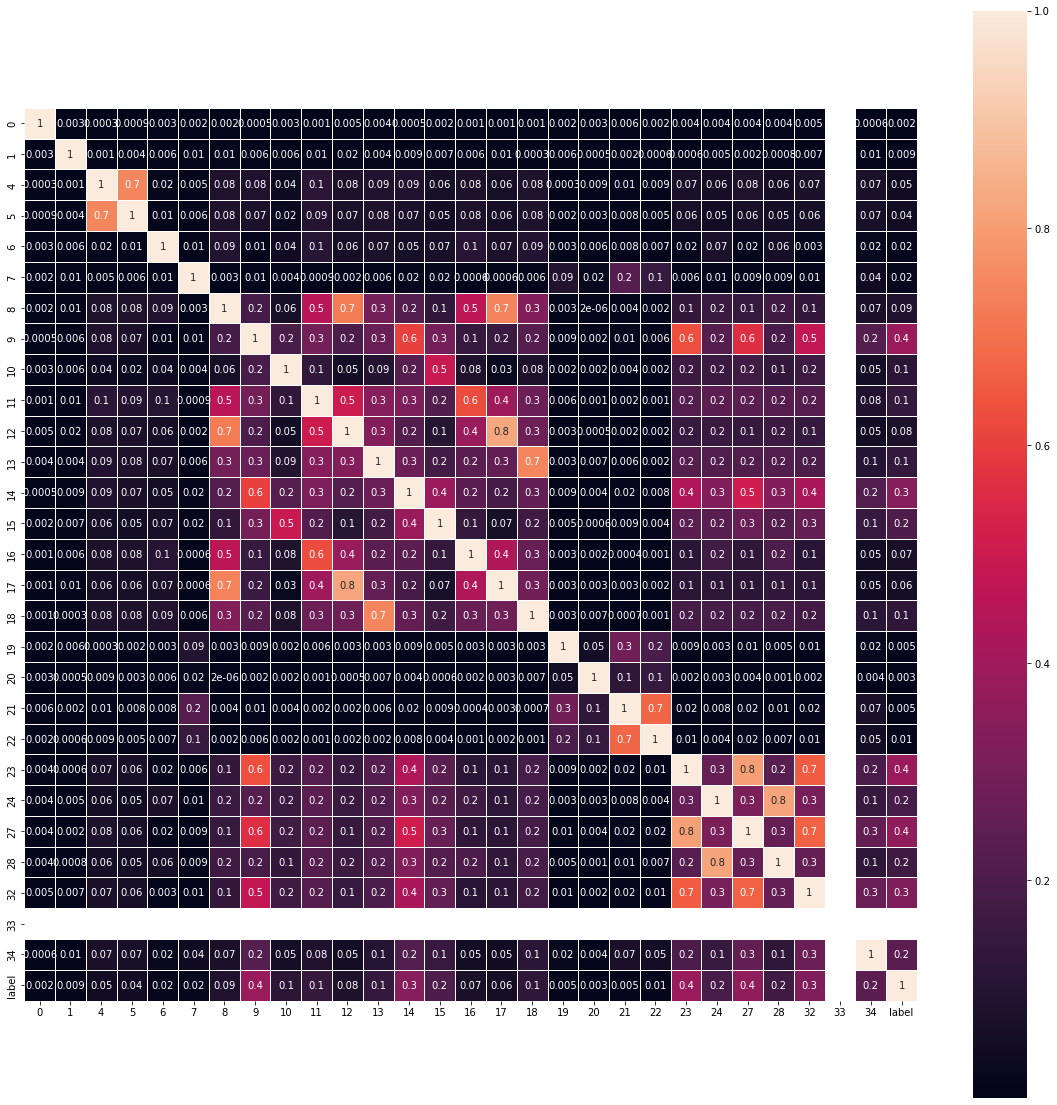

In [29]:
# correlatiion plot for corr
df_corr=df_n.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

In [30]:
df_n.describe()

,0,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,27,28,32,33,34,label
count,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,3.670570e+05,367057.0,3.670570e+05,367057.000000
mean,1.982975e-17,1.800913e-16,3.168272e-15,-2.884801e-17,4.661867e-15,-2.700039e-14,-6.407259e-14,-8.626280e-14,-9.417975e-14,2.872615e-14,2.170166e-14,2.220339e-14,-2.433771e-13,6.052849e-14,-1.290085e-14,8.301764e-15,-5.013086e-14,-1.231768e-14,5.069932e-15,-8.405741e-15,2.131829e-14,2.340284e-13,-5.930172e-14,1.325170e-13,6.666611e-14,4.147588e-13,0.0,8.824254e-15,0.499734
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,1.000001e+00,0.500001
min,-1.735060e+00,-1.510463e+00,-1.621549e+00,-1.606434e+00,-6.584613e-01,-2.822687e-01,-1.450173e+00,-8.543295e-01,-3.595092e-01,-1.275419e+00,-1.148081e+00,-1.278722e+00,-9.861256e-01,-7.026790e-01,-1.269774e+00,-1.215652e+00,-1.394483e+00,-8.003951e-02,-7.362681e-02,-9.389249e-02,-6.198533e-02,-8.781358e-01,-1.999896e+00,-8.041001e-01,-1.785445e+00,-7.172005e-01,0.0,-1.812067e+00,0.000000
25%,-8.698093e-01,-8.374067e-01,-8.692326e-01,-8.835117e-01,-5.068474e-01,-1.089917e-01,-8.759945e-01,-8.041087e-01,-3.595092e-01,-9.540092e-01,-7.464497e-01,-1.042376e+00,-9.493841e-01,-7.026790e-01,-8.833228e-01,-8.318489e-01,-9.911041e-01,-8.003951e-02,-7.362681e-02,-9.389249e-02,-6.198533e-02,-7.935635e-01,-9.384438e-01,-8.014082e-01,-1.129134e+00,-7.172005e-01,0.0,-7.563781e-01,0.000000
50%,-1.667818e-03,-3.865336e-02,-1.763945e-02,-1.319021e-02,-3.906101e-01,-1.089917e-01,7.357152e-03,-3.019015e-01,-3.536320e-01,-1.333737e-01,-3.391616e-01,-1.362218e-01,-1.043289e-01,-5.602833e-01,-1.981796e-01,-4.192610e-01,-7.670450e-02,-8.003951e-02,-7.362681e-02,-9.389249e-02,-6.198533e-02,-5.398467e-01,5.475886e-01,-4.057001e-01,5.772752e-01,-7.172005e-01,0.0,-1.739617e-02,0.000000
75%,8.658023e-01,5.933959e-01,8.579914e-01,8.685358e-01,-2.592113e-01,-1.089917e-01,1.155714e+00,4.011887e-01,-2.478429e-01,1.047917e+00,1.340902e+00,8.968172e-01,6.305016e-01,3.890212e-01,1.028286e+00,1.298256e+00,8.976539e-01,-8.003951e-02,-7.362681e-02,-9.389249e-02,-6.198533e-02,5.595928e-01,8.306423e-01,7.275864e-01,8.835538e-01,6.690261e-01,0.0,6.160169e-01,1.000000
max,1.738065e+00,2.506482e+00,1.764912e+00,1.758422e+00,5.330289e+00,1.819536e+01,1.597390e+00,2.661121e+00,5.999592e+00,1.540633e+00,1.731219e+00,1.973790e+00,3.018701e+00,3.474261e+00,1.607555e+00,1.696451e+00,1.870258e+00,2.506314e+01,2.461018e+01,2.097206e+01,2.744672e+01,2.420183e+00,1.325986e+00,2.181208e+00,1.189832e+00,2.663147e+00,0.0,2.463472e+00,1.000000


In [31]:
for column in df_n.columns:
    print(df_n[column].value_counts())

 0.435079    10
 0.835648    10
-1.034494     9
-0.658746     9
-0.043011     9
             ..
-1.464173     1
-1.015939     1
-1.101721     1
 0.591260     1
 0.526307     1
Name: 0, Length: 186243, dtype: int64
-0.907833    398
 2.275592    398
-1.388333    391
-1.143180    390
-0.917639    389
            ... 
 2.503807      1
 2.485086      1
 2.397723      1
 2.346018      1
 2.479738      1
Name: 1, Length: 4507, dtype: int64
-1.510586    16445
-0.521635     1656
 1.750433     1393
 0.413628      542
-0.531066      477
             ...  
 0.118950        1
-0.466436        1
 1.412292        1
-0.999979        1
 0.693444        1
Name: 4, Length: 132148, dtype: int64
-1.500023    15797
-0.530568     1190
 1.744321     1140
 1.018751      982
 1.605391      818
             ...  
 0.345575        1
-0.960934        1
-0.663056        1
-0.863232        1
 1.735541        1
Name: 5, Length: 141033, dtype: int64
-0.506847    51331
-0.511901    47031
-0.390610    31366
-0.335018   

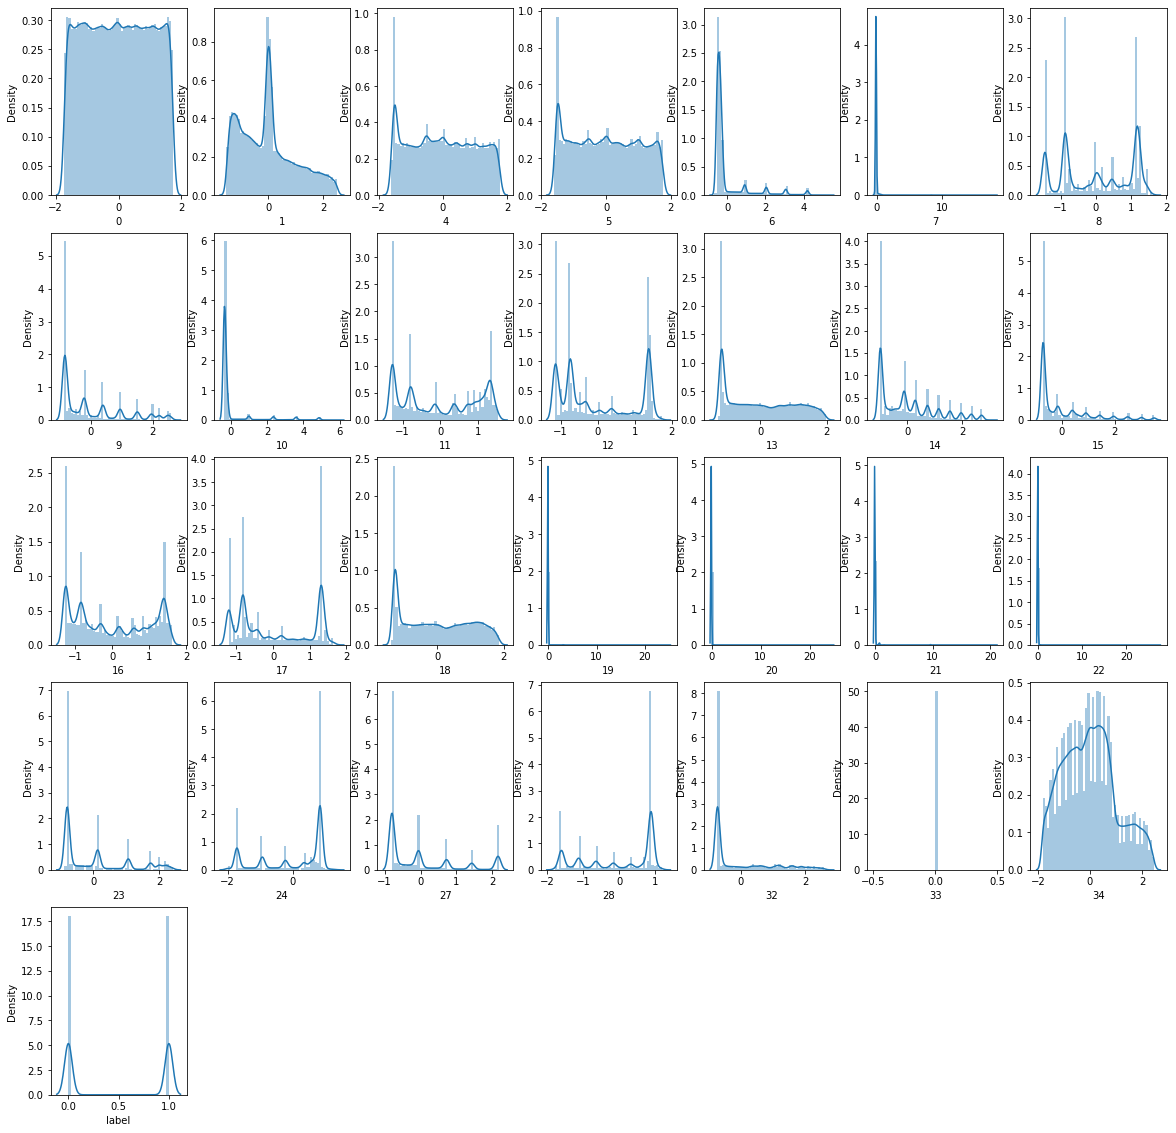

In [32]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df_n:
    if plotnumber<=35:
        ax=plt.subplot(5,7,plotnumber)
        sns.distplot(df_n[i])
        plt.xlabel(i)
    plotnumber+=1

In [33]:
# dropping columns 7,19,20,21,22,33 because value distributions are too negligible to make any difference
df_n = df_n.drop(columns = [7,19,20,21,22,33])

In [34]:
df_n.shape

(367057, 23)

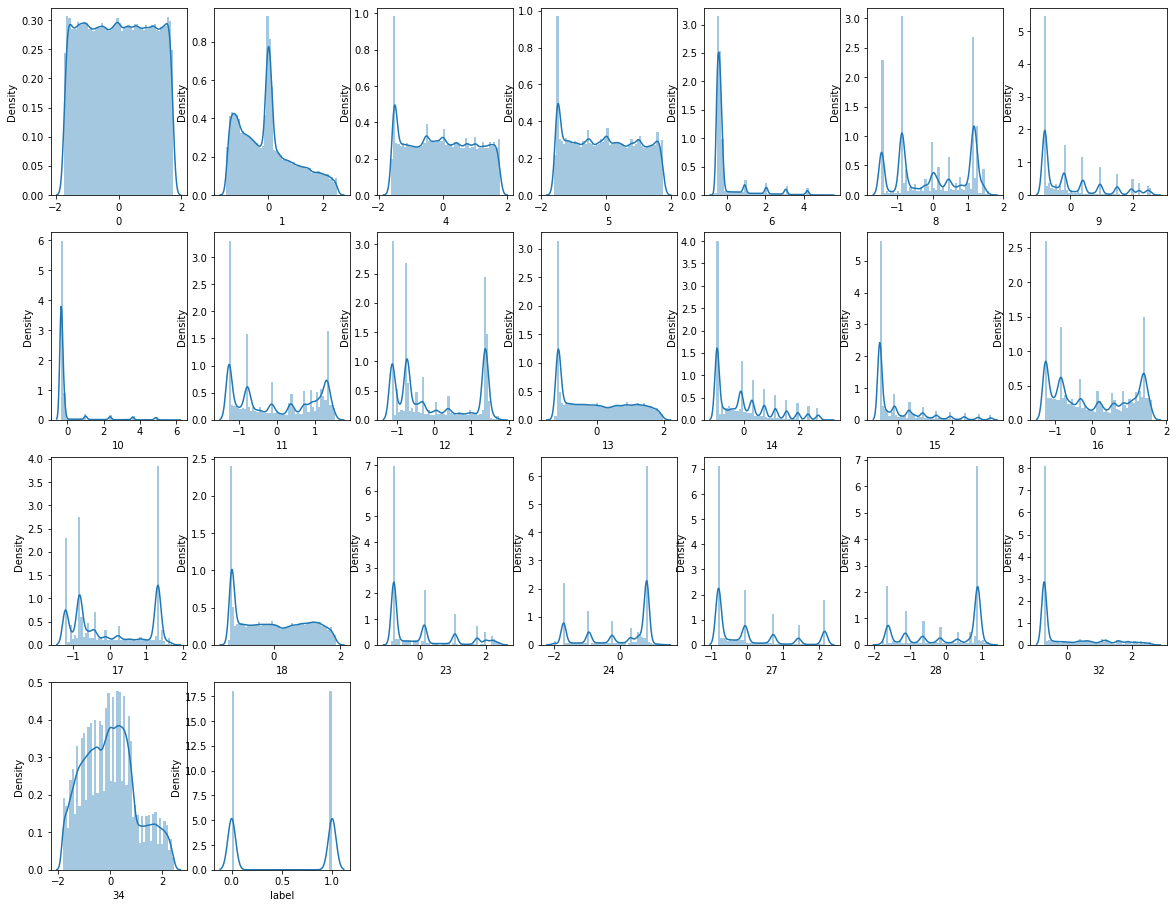

In [35]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df_n:
    if plotnumber<=35:
        ax=plt.subplot(5,7,plotnumber)
        sns.distplot(df_n[i])
        plt.xlabel(i)
    plotnumber+=1

In [36]:
df_n.skew()

0        0.002869
1        0.562928
4        0.053891
5        0.057261
6        2.601850
8       -0.030455
9        1.098867
10       3.389790
11       0.073150
12       0.365106
13       0.311422
14       0.939282
15       1.620823
16       0.183523
17       0.290005
18       0.171886
23       1.017845
24      -0.724376
27       1.092725
28      -0.529894
32       1.102467
34       0.319386
label    0.001063
dtype: float64

In [37]:
# separating labels and features
x=df_n.drop(columns=['label'],axis=1)
y=df_n['label']

In [38]:
x

,0,1,4,5,6,8,9,10,11,12,13,14,15,16,17,18,23,24,27,28,32,34
0,-0.985560,-0.054700,-0.392478,-0.167080,-0.390610,-0.875994,-0.201460,-0.277229,0.356180,-0.746450,1.423599,-0.104329,-0.038166,0.162098,-0.831849,1.365815,0.136731,-1.716842,-0.053062,-1.610429,1.052511,0.774370
1,0.918447,1.152345,0.295132,0.312769,-0.385556,0.802374,-0.804109,-0.359509,1.115808,0.961897,1.228087,-0.949384,-0.702679,1.106445,0.823300,1.188898,-0.793564,-1.716842,-0.801408,-1.610429,-0.717201,1.882843
2,-1.108584,0.322390,1.614126,1.606513,-0.335018,-0.875994,-0.804109,-0.359509,-0.788469,-0.746450,1.335837,-0.949384,-0.702679,-0.853345,-0.831849,1.286893,-0.793564,0.830642,-0.801408,0.883554,-0.717201,2.357903
3,0.207307,-0.095707,-0.837789,-0.855024,-0.269319,1.553222,-0.854329,-0.359509,-1.275419,-1.148081,-1.168726,-0.949384,-0.702679,1.564989,1.624488,-0.446104,0.136731,-1.716842,-0.053062,-1.610429,-0.717201,-1.548144
4,-1.606199,2.263111,-1.374253,-1.369277,-0.279427,0.007357,2.209135,-0.288983,-0.379081,-0.322191,0.117335,2.320612,-0.133096,-0.287570,-0.188979,0.347173,2.251038,0.618352,2.173132,0.664783,0.548299,-0.703594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367052,0.331561,1.665829,-0.600334,-0.344470,-0.304695,-0.301816,-0.101019,-0.118545,0.722044,-0.537149,1.178487,-0.030846,0.483952,0.600082,-0.615960,1.179471,-0.793564,0.830642,-0.801408,0.883554,-0.717201,0.246526
367053,0.374639,0.548823,-0.560767,-0.377538,-0.456309,0.007357,-0.452564,-0.277229,0.729484,-0.163802,1.080464,-0.435003,-0.038166,0.576716,-0.284930,1.045194,-0.455274,0.123008,-0.513376,0.095980,-0.717201,0.140957
367054,0.273471,1.500908,-0.560767,-0.421510,0.231007,-0.478486,0.350968,0.375137,0.808162,-0.740793,1.118626,0.483536,1.148465,0.855211,-0.692720,1.312323,-0.793564,0.830642,-0.801408,0.883554,-0.717201,-0.334103
367055,0.295756,1.564202,-0.575938,-0.391949,0.023801,-0.434319,0.150085,0.187068,0.775240,-0.661598,1.141608,0.299828,0.911139,0.757398,-0.663935,1.261353,-0.793564,0.830642,-0.801408,0.883554,-0.717201,-0.122965


In [39]:
y

0         0
1         1
2         1
3         1
4         1
         ..
367052    0
367053    0
367054    0
367055    0
367056    0
Name: label, Length: 367057, dtype: int64

In [40]:
# Treating Skew
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [41]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

0     0.000731
1     0.067632
4     0.012162
5     0.014239
6     0.879212
8    -0.016903
9     0.332826
10    1.488075
11    0.028412
12    0.150409
13    0.100445
14    0.201423
15    0.489837
16    0.065237
17    0.121442
18    0.053370
23    0.386921
24   -0.358924
27    0.368518
28   -0.283443
32    0.556523
34    0.037253
dtype: float64

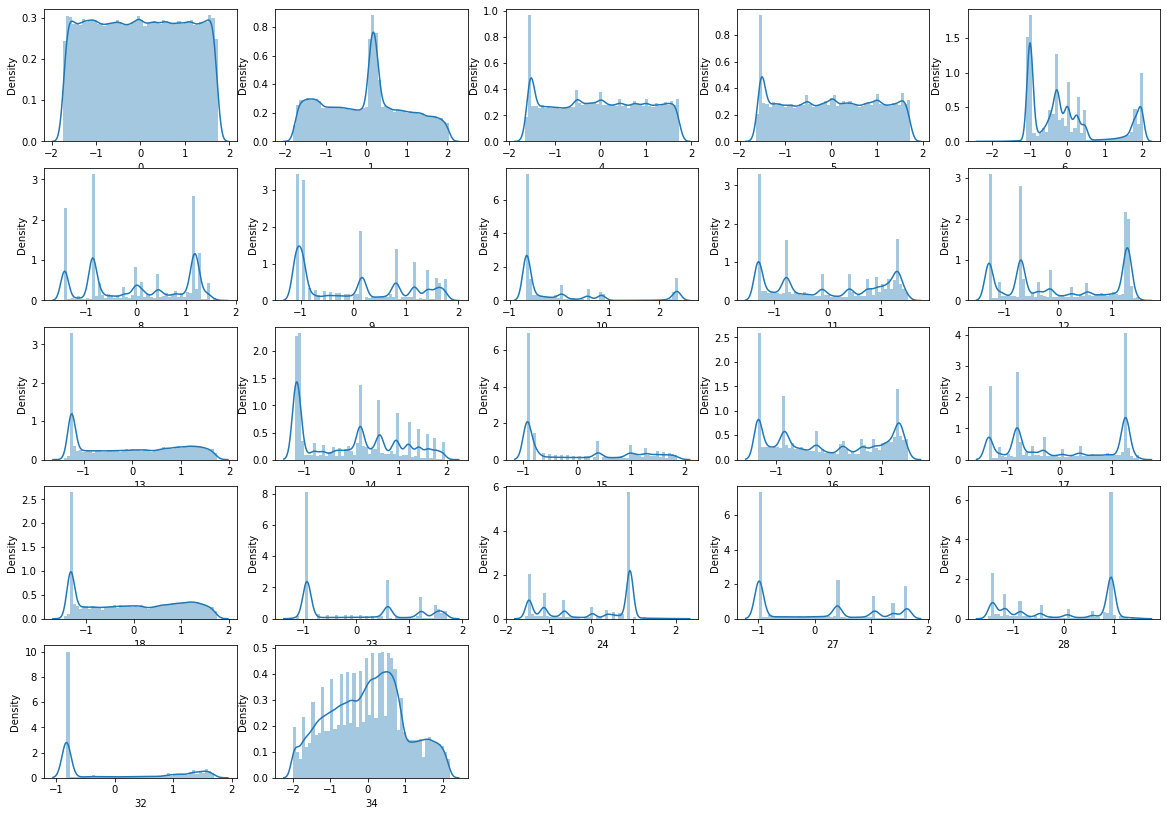

In [42]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [43]:
x = data_new

The data looks decent enough to be fit into a model now. So we will proceed with modelling.

## Model

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [45]:
#Classifiers :
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
m_list = [dt,rf]

In [46]:
# Fitting Models
for m in m_list:
    m.fit(x_train,y_train)
#     Training------->>>>>
    print(m)
    train_preds = m.predict(x_train)
    print('Accuracy Score :',accuracy_score(y_train,train_preds)*100)
    
#     Testing------->>>>>>
    print(m)
    test_preds = m.predict(x_test)
    te_acc = accuracy_score(y_test,test_preds)*100
    print('Accuracy Score :',accuracy_score(y_test,test_preds)*100)
    
    
#     CV-------->>>>>
    print('cross validation scores below:--  \n',m)
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score : ',scr.mean()*100)
    print('Difference between CV_score and acc : ',(te_acc-scr.mean()*100))
    print('\n')
    print('\n')

DecisionTreeClassifier()
Accuracy Score : 99.99854699737007
DecisionTreeClassifier()
Accuracy Score : 89.55266169018688
cross validation scores below:--  
 DecisionTreeClassifier()
Cross validation score :  88.55956805814532
Difference between CV_score and acc :  0.993093632041564




RandomForestClassifier()
Accuracy Score : 99.99854699737007
RandomForestClassifier()
Accuracy Score : 93.48444396011551
cross validation scores below:--  
 RandomForestClassifier()
Cross validation score :  92.57175597155242
Difference between CV_score and acc :  0.9126879885630927






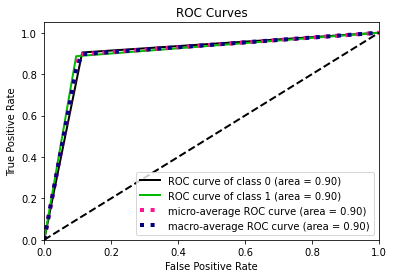

In [51]:
import scikitplot as skplt
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

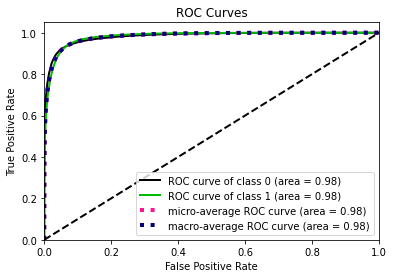

In [52]:
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

In [55]:
# Parameter Grid
grid_param={'criterion':['gini','entropy'],
            'max_depth':range(8,26,4),
            'min_samples_leaf':range(22,40,4),
            'min_samples_split':range(10,50,4)}

In [56]:
grid_search=GridSearchCV(dt,param_grid=grid_param,cv=5,n_jobs=15,verbose = 1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=15,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(8, 26, 4),
                         'min_samples_leaf': range(22, 40, 4),
                         'min_samples_split': range(10, 50, 4)},
             verbose=1)

In [57]:
# Best Parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 24,
 'min_samples_leaf': 26,
 'min_samples_split': 10}

In [58]:
# Model Fitted with best Parameters
dt=DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=26, min_samples_split=10)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred)*100

90.71650411376886

In [60]:
# Classification report of Best model
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.908928,0.905419,0.907165,0.907173,0.907173
recall,0.904945,0.909384,0.907165,0.907164,0.907165
f1-score,0.906932,0.907397,0.907165,0.907164,0.907165
support,45868.000000,45897.000000,0.907165,91765.000000,91765.000000


In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

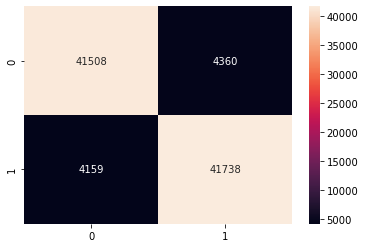

In [62]:
sns.heatmap(cm,annot=True,fmt='d')
plt.savefig('heatmap.png')
plt.show()

In [63]:
import joblib

joblib.dump(dt,'DT_best.obj')

['DT_best.obj']

In [64]:
joblib.load('DT_best.obj')

DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=26,
                       min_samples_split=10)